# Class defs EXPERT

Esta tabla contiene la información de las definiciones de clases.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'classdef__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('classdefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-14 13:30:31.575627 Data cache files found ...
2024-06-14 13:30:31.581141 Data cache files successfully loaded!!
The dataset contains 7755 (34.74%) instances for BEGINNER class and 14569 (65.26%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'classdefs'
TABLE_FEATURES = ['classdef__name_convention', 'classdef__is_enum_class', 'classdef__number_of_characters', 'classdef__number_of_decorators', 'classdef__number_of_methods', 'classdef__number_of_base_classes', 'classdef__has_generic_type_annotations', 'classdef__has_doc_string', 'classdef__body_count', 'classdef__assignments_pct', 'classdef__expressions_pct', 'classdef__uses_meta_class', 'classdef__number_of_keywords', 'classdef__height', 'classdef__average_stmts_method_body', 'classdef__type_annotations_pct', 'classdef__private_methods_pct', 'classdef__magic_methods_pct', 'classdef__async_methods_pct', 'classdef__class_methods_pct', 'classdef__static_methods_pct', 'classdef__abstract_methods_pct', 'classdef__property_methods_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

 EXPERT CLASS Features shape: (14569, 23)
As we can see the downloaded data contains a total of 14569 instances. For each instance we have 23 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14569 entries, 955 to 22323
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   classdef__name_convention               14569 non-null  object 
 1   classdef__is_enum_class                 14569 non-null  bool   
 2   classdef__number_of_characters          14569 non-null  int64  
 3   classdef__number_of_decorators          14569 non-null  int64  
 4   classdef__number_of_methods             14569 non-null  int64  
 5   classdef__number_of_base_classes        14569 non-null  int64  
 6   classdef__has_generic_type_annotations  14569 non-null  bool   
 7   classdef__has_doc_string                14569 non-null  bool   
 8   classdef__body_count                    14569 non-null  int64  
 9   classdef__assignments_pct               14569 non-null  float64
 10  classdef__expressions_pct               14569 non-null  float

Cómo podemos ver la tabla está compuesta por 18 variables numéricas, 4 variables boleanas y 1 de tipo objeto. 

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

classdef__name_convention                 0
classdef__is_enum_class                   0
classdef__number_of_characters            0
classdef__number_of_decorators            0
classdef__number_of_methods               0
classdef__number_of_base_classes          0
classdef__has_generic_type_annotations    0
classdef__has_doc_string                  0
classdef__body_count                      0
classdef__assignments_pct                 0
classdef__expressions_pct                 0
classdef__uses_meta_class                 0
classdef__number_of_keywords              0
classdef__height                          0
classdef__average_stmts_method_body       0
classdef__type_annotations_pct            0
classdef__private_methods_pct             0
classdef__magic_methods_pct               0
classdef__async_methods_pct               0
classdef__class_methods_pct               0
classdef__static_methods_pct              0
classdef__abstract_methods_pct            0
classdef__property_methods_pct  

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

classdef__name_convention
-------------------------
0 instancias no tienen un valor para la columna classdef__name_convention


classdef__is_enum_class
-----------------------
0 instancias no tienen un valor para la columna classdef__is_enum_class


classdef__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_characters


classdef__number_of_decorators
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_decorators


classdef__number_of_methods
---------------------------
0 instancias no tienen un valor para la columna classdef__number_of_methods


classdef__number_of_base_classes
--------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_base_classes


classdef__has_generic_type_annotations
--------------------------------------
0 instancias no tienen un valor para la columna classdef__has_generic_type_annotations


classdef__has_

### 2.2 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classdef__name_convention,14569,7,CamelUp,13296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__is_enum_class,14569,2,False,14271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__number_of_characters,14569.0,NaN,NaN,NaN,14.341273,7.001094,1.0,9.0,14.0,19.0,52.0
classdef__number_of_decorators,14569.0,NaN,NaN,NaN,0.217517,0.448906,0.0,0.0,0.0,0.0,5.0
classdef__number_of_methods,14569.0,NaN,NaN,NaN,3.895532,6.069833,0.0,1.0,2.0,5.0,231.0
classdef__number_of_base_classes,14569.0,NaN,NaN,NaN,0.793809,0.691628,0.0,0.0,1.0,1.0,45.0
classdef__has_generic_type_annotations,14569,1,False,14569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__has_doc_string,14569,2,False,8581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__body_count,14569.0,NaN,NaN,NaN,5.378681,8.520318,1.0,2.0,3.0,6.0,618.0
classdef__assignments_pct,14569.0,NaN,NaN,NaN,0.176116,0.322914,0.0,0.0,0.0,0.230769,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "classdef__number_of_characters": [(0.0, 9.0), (9.0, 13.0), (13.0, 18.0), (18.0, inf)], # min: 1 ; max: 52
    "classdef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 5
    "classdef__number_of_methods": [(0.0, 1.0), (1.0, 2.0), (2.0, 5.0), (5.0, inf)], # min: 0 ; max: 231
    "classdef__number_of_base_classes": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)], # min: 0 ; max: 45
    "classdef__body_count": [(0.0, 2.0), (2.0, 3.0), (3.0, 7.0), (7.0, inf)], # min: 1 ; max: 618
    "classdef__assignments_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__expressions_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__number_of_keywords": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 2.0
    "classdef__height": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 1.0 ; max: 8.0
    "classdef__average_stmts_method_body": [(0.0, 1.0), (1.0, 2.2), (2.2, 4.0), (4.0, inf)], # min: 0.0 ; max: 114.0
    "classdef__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__private_methods_pct": [(0.0, 0.0), (0.0, 0.25), (0.25, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__magic_methods_pct": [(0.0, 0.0), (0.0, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__async_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__class_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__static_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__abstract_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__property_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['classdef__number_of_characters'], 10))
print(get_statistics(X_copy, ['classdef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['classdef__number_of_methods'], 10))
print(get_statistics(X_copy, ['classdef__number_of_base_classes'], 10))
print(get_statistics(X_copy, ['classdef__body_count'], 10))
print(get_statistics(X_copy, ['classdef__assignments_pct'], 10))
print(get_statistics(X_copy, ['classdef__expressions_pct'], 10))
print(get_statistics(X_copy, ['classdef__number_of_keywords'], 10))
print(get_statistics(X_copy, ['classdef__height'], 10))
print(get_statistics(X_copy, ['classdef__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['classdef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['classdef__private_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__magic_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__async_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__class_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__static_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__abstract_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__property_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__name_convention'], 10))
print(get_statistics(X_copy, ['classdef__is_enum_class'], 10))
print(get_statistics(X_copy, ['classdef__has_generic_type_annotations'], 10))
print(get_statistics(X_copy, ['classdef__has_doc_string'], 10))
print(get_statistics(X_copy, ['classdef__uses_meta_class'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['classdef__assignments_pct', 'classdef__expressions_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
classdef__number_of_characters  count  percentage
                    [18.0_inf]   4312   29.597090
                   [13.0_18.0)   4002   27.469284
                    [9.0_13.0)   3290   22.582195
                     [0.0_9.0)   2965   20.351431

classdef__number_of_decorators  count  percentage
                     [0.0_0.0]  11595   79.586794
                     [0.0_inf]   2974   20.413206

classdef__number_of_methods  count  percentage
                  [2.0_5.0)   5905   40.531265
                  [5.0_inf]   3736   25.643490
                  [1.0_2.0)   2472   16.967534
                  [0.0_1.0)   2456   16.857712

classdef__number_of_base_classes  count  percentage
                       [1.0_1.0]   9979   68.494749
                       [0.0_0.0]   3919   26.899581
                       [1.0_inf]    671    4.605670

classdef__body_count  count  percentage
           [3.0_7.0)   5743   39.419315
           [7.0_inf]   3384   23.227401
          

### IMPORTANTE
6400 clases sin asignaciones ni expresiones, el 41% hay que revisarlo.

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (14569, 29)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

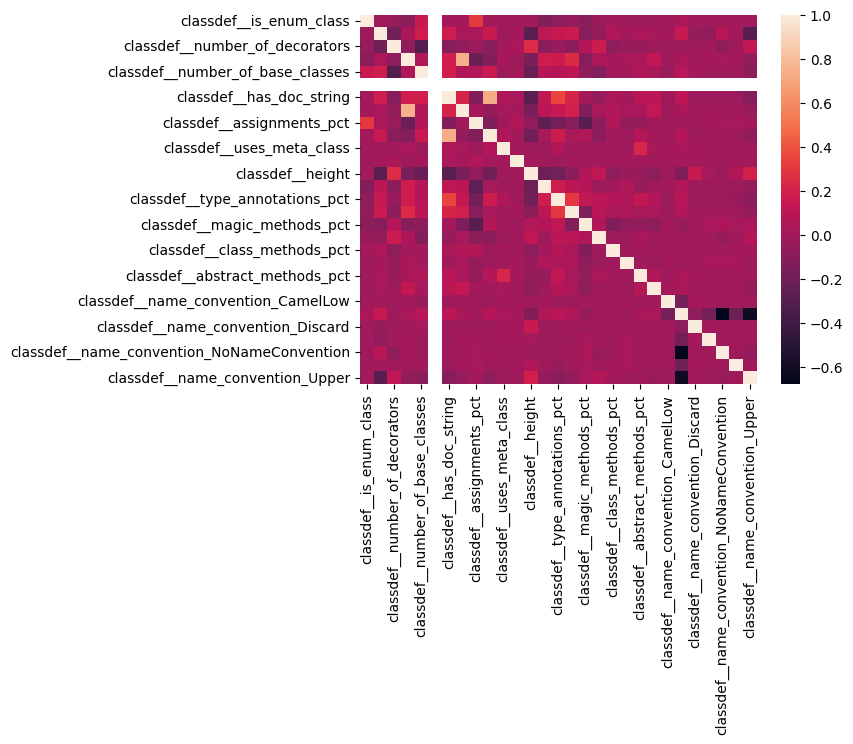

In [10]:
sns.heatmap(X.corr(), annot=False)

### IMPORTANTE
TODO

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 23 variables (8 numericas, 10 procentuales, 4 booleanas y 1 categorica)

### Variable is_enum_class (1/23)
Esta variable es de tipo booleano y representa si la clase hereda de la clase Enum.

<Axes: xlabel='classdef__is_enum_class', ylabel='Count'>

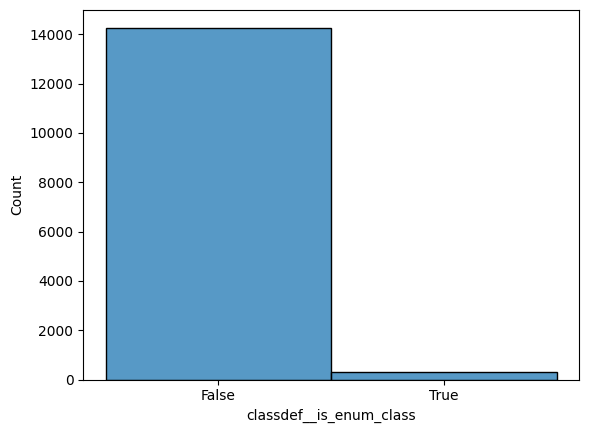

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__is_enum_class'], discrete=True)

In [12]:
num_true_values = len(X[X['classdef__is_enum_class'] == True])
num_false_values = len(X[X['classdef__is_enum_class'] == False])
std = X['classdef__is_enum_class'].std()
freq_true = len(X[X['classdef__is_enum_class'] == True]) / len(X['classdef__is_enum_class'])
freq_false = len(X[X['classdef__is_enum_class'] == False]) / len(X['classdef__is_enum_class'])
print(f'La variable is_enum_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a False es {freq_false}.')

La variable is_enum_class contiene 298 valores verdaderos y 14271 valores falsos. Y, la desviación típica es de 0.14155346155166626
La frecuencia con la que programa puede tener la variable is_enum_class a True es 0.020454389457066374.
La frecuencia con la que programa puede tener la variable is_enum_class a False es 0.9795456105429337.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__is_enum_class', possible_values)

La variable classdef__is_enum_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__is_enum_class toma el valor de 0.0 en un 97.95% de los items.
La variable classdef__is_enum_class toma el valor de 1.0 en un 2.045% de los items.


In [14]:
X[X['classdef__is_enum_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,298.0,298.000000,298.000000,298.000000,298.000000,298.0,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.0,298.000000,298.0,298.000000,298.0,298.0,298.000000,298.0,298.000000
mean,1.0,13.614094,0.070470,0.197987,1.526846,0.0,0.399329,5.419463,0.857084,0.103867,...,0.003356,0.0,0.013423,0.0,0.963087,0.0,0.0,0.010067,0.0,0.026846
std,0.0,6.013627,0.269181,0.772679,0.500119,0.0,0.490584,5.452756,0.204797,0.150827,...,0.057928,0.0,0.115270,0.0,0.188865,0.0,0.0,0.099997,0.0,0.161904
min,1.0,3.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
25%,1.0,9.000000,0.000000,0.000000,1.000000,0.0,0.000000,3.000000,0.750000,0.000000,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000
50%,1.0,13.000000,0.000000,0.000000,2.000000,0.0,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000
75%,1.0,17.000000,0.000000,0.000000,2.000000,0.0,1.000000,6.000000,1.000000,0.237500,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000
max,1.0,34.000000,2.000000,8.000000,2.000000,0.0,1.000000,41.000000,1.000000,0.600000,...,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000


### IMPORTANTE
Apenas un 2% de clase son Enum

### Variable has_generic_type_annotations (2/23)
Esta variable es de tipo booleano y representa si la clase define un tipo genérico

<Axes: xlabel='classdef__has_generic_type_annotations', ylabel='Count'>

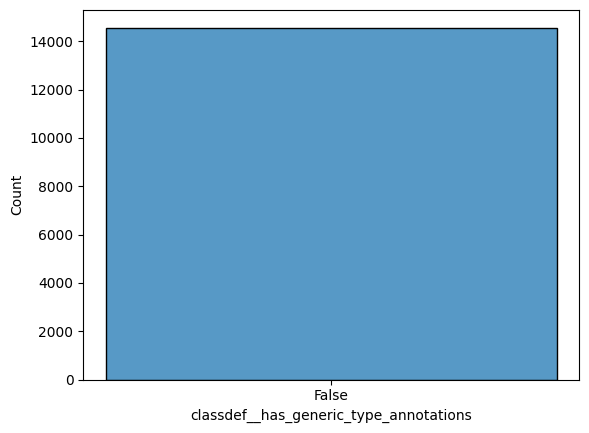

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_generic_type_annotations'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_generic_type_annotations'] == True])
num_false_values = len(X[X['classdef__has_generic_type_annotations'] == False])
std = X['classdef__has_generic_type_annotations'].std()
freq_true = len(X[X['classdef__has_generic_type_annotations'] == True]) / len(X['classdef__has_generic_type_annotations'])
freq_false = len(X[X['classdef__has_generic_type_annotations'] == False]) / len(X['classdef__has_generic_type_annotations'])
print(f'La variable has_generic_type_annotations contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es {freq_false}.')

La variable has_generic_type_annotations contiene 0 valores verdaderos y 14569 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es 0.0.
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es 1.0.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_generic_type_annotations', possible_values)

La variable classdef__has_generic_type_annotations contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_generic_type_annotations toma el valor de 0.0 en un 100.0% de los items.
La variable classdef__has_generic_type_annotations toma el valor de True en un 0.0% de los items. [OUTLIER]


In [18]:
X[X['classdef__has_generic_type_annotations'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna definicion de clase que tenga anotaciones de tipo genérico.
Esta propiedad es de python 3.12.

### Variable has_doc_string (3/23)
Esta variable es booleana y representa si el primer elemento del cuerpo de la clase es un doc_string. String planos usados como comentarios.

<Axes: xlabel='classdef__has_doc_string', ylabel='Count'>

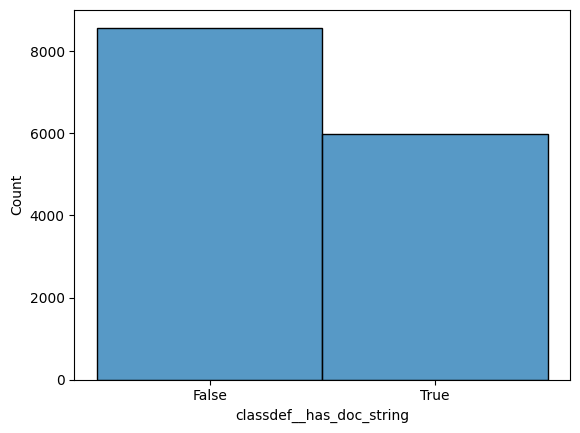

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_doc_string'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_doc_string'] == True])
num_false_values = len(X[X['classdef__has_doc_string'] == False])
std = X['classdef__has_doc_string'].std()
freq_true = len(X[X['classdef__has_doc_string'] == True]) / len(X['classdef__has_doc_string'])
freq_false = len(X[X['classdef__has_doc_string'] == False]) / len(X['classdef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 5988 valores verdaderos y 8581 valores falsos. Y, la desviación típica es de 0.4920338988304138
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.41100967808360217.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.5889903219163979.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_doc_string', possible_values)

La variable classdef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_doc_string toma el valor de 0.0 en un 58.9% de los items.
La variable classdef__has_doc_string toma el valor de 1.0 en un 41.1% de los items.


In [22]:
X[X['classdef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.0,5988.0,5988.000000,5988.000000,5988.000000,...,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.0,5988.000000,5988.000000,5988.000000,5988.000000
mean,0.019873,15.743153,0.156480,5.192218,0.946560,0.0,1.0,7.573480,0.131475,0.236750,...,0.016783,0.018784,0.043030,0.002004,0.945057,0.0,0.001837,0.037408,0.002171,0.011523
std,0.139576,6.453971,0.383904,7.482397,0.818087,0.0,0.0,11.443376,0.236047,0.166080,...,0.101462,0.117717,0.135764,0.044725,0.227888,0.0,0.042825,0.189776,0.046547,0.106734
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,0.004310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,2.000000,1.000000,0.0,1.0,3.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.000000,0.000000,3.000000,1.000000,0.0,1.0,5.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,0.000000,6.000000,1.000000,0.0,1.0,9.000000,0.200000,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,50.000000,2.000000,231.000000,45.000000,0.0,1.0,618.000000,0.978261,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable uses_meta_class (4/23)
Esta variable es booleana y representa si la clase usa una metaclass.

<Axes: xlabel='classdef__uses_meta_class', ylabel='Count'>

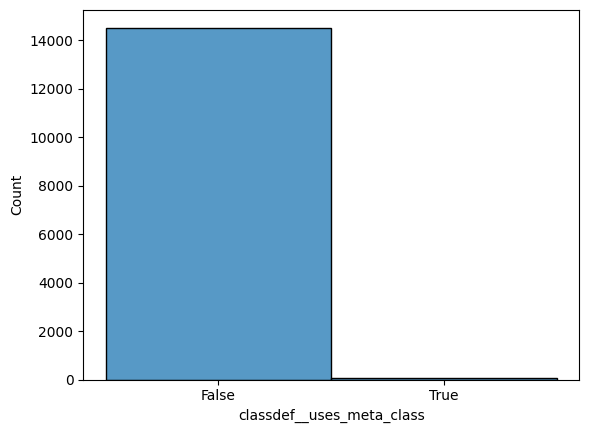

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__uses_meta_class'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__uses_meta_class'] == True])
num_false_values = len(X[X['classdef__uses_meta_class'] == False])
std = X['classdef__uses_meta_class'].std()
freq_true = len(X[X['classdef__uses_meta_class'] == True]) / len(X['classdef__uses_meta_class'])
freq_false = len(X[X['classdef__uses_meta_class'] == False]) / len(X['classdef__uses_meta_class'])
print(f'La variable uses_meta_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a False es {freq_false}.')

La variable uses_meta_class contiene 52 valores verdaderos y 14517 valores falsos. Y, la desviación típica es de 0.05963830277323723
La frecuencia con la que programa puede tener la variable uses_meta_class a True es 0.003569222321367287.
La frecuencia con la que programa puede tener la variable uses_meta_class a False es 0.9964307776786328.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__uses_meta_class', possible_values)

La variable classdef__uses_meta_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__uses_meta_class toma el valor de 0.0 en un 99.64% de los items.
La variable classdef__uses_meta_class toma el valor de 1.0 en un 0.3569% de los items.


In [26]:
X[X['classdef__uses_meta_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,52.0,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.0,52.0,52.0,52.0,52.0,52.0,52.0
mean,0.0,12.346154,0.250000,6.000000,0.519231,0.0,0.846154,7.596154,0.086205,0.217210,...,0.003259,0.331517,0.052595,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,4.129685,0.437237,6.877072,0.699871,0.0,0.364321,6.892052,0.149636,0.243059,...,0.018283,0.430600,0.161227,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,9.000000,0.000000,2.000000,0.000000,0.0,1.000000,3.000000,0.000000,0.089015,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,12.500000,0.000000,4.500000,0.000000,0.0,1.000000,6.000000,0.000000,0.133929,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,14.000000,0.250000,7.250000,1.000000,0.0,1.000000,10.000000,0.120455,0.287879,...,0.000000,0.847222,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,25.000000,1.000000,45.000000,2.000000,0.0,1.000000,46.000000,0.500000,1.000000,...,0.125000,1.000000,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Menos del 0,4% de las clases usan metaclass.

### Variable number_of_characters (5/23)
Esta variable representa el número de caracteres que tiene el nombre de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 52. Con una media de 14.1.

<Axes: ylabel='classdef__number_of_characters'>

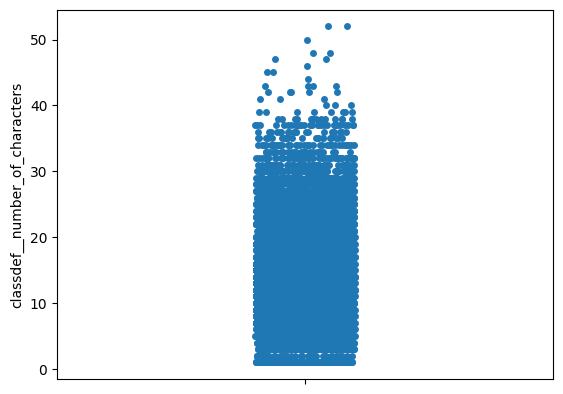

In [27]:
sns.stripplot(X['classdef__number_of_characters'])

In [28]:
print_outliers_for_df_column(X, 'classdef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5824252052905886
Rango valores atípicos extremos (Tukey): [-21.0,49.0]
Rango valores atípicos leves (Tukey): [-6.0,34.0]
Rango valores atípicos extremos (Fixed BoxPlot): [7.046618481901358,173.12300575562816]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -21.0 (Q1-3*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -6.0 (Q1-1.5*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 121 instancias tienen un valor para classdef__number_of_characters superior a 34.0 (Q3+1.5*IQR) para classdef__number_of_characters. Representando un 0.8305% del total de instancias.
+3.0IQR: 3 instancias tienen un valor para classdef__number_of_characters superior a 49.0 (Q3-3*IQR) para classdef__number_of_characters. Representando un 0.02059% de

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 49.0 (Con un MC de 58 usamos Tuckey Extremo)

In [29]:
X[X['classdef__number_of_characters'] > 49.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.000000,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,0.0,51.333332,0.666667,1.333333,1.0,0.0,0.333333,2.0,0.166667,0.166667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,1.154701,0.577350,0.577350,0.0,0.0,0.577350,0.0,0.288675,0.288675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,50.000000,0.000000,1.000000,1.0,0.0,0.000000,2.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,51.000000,0.500000,1.000000,1.0,0.0,0.000000,2.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,52.000000,1.000000,1.000000,1.0,0.0,0.000000,2.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,52.000000,1.000000,1.500000,1.0,0.0,0.500000,2.0,0.250000,0.250000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,52.000000,1.000000,2.000000,1.0,0.0,1.000000,2.0,0.500000,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Revisar las 3 clases con nombres largos

### Variable number_of_decorators (6/23)
Esta variable representa el número de decoradores que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 5. Con una media de 0.21.

<Axes: ylabel='classdef__number_of_decorators'>

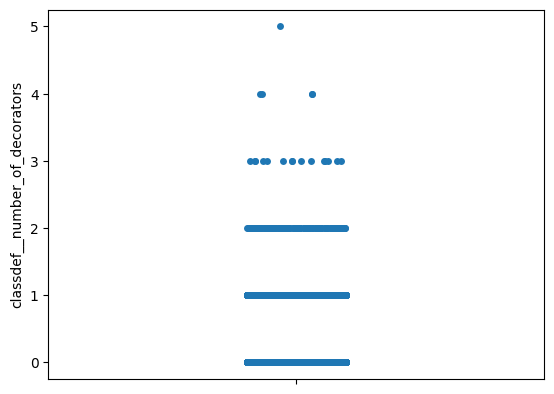

In [30]:
sns.stripplot(X['classdef__number_of_decorators'])

In [31]:
print_outliers_for_df_column(X, 'classdef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7359740035001744
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 2974 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_decorators. Representando un 20.41% del total de instancias.
+3.0IQR: 2974 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3-3*IQR) para classdef__number_of_decorators. Representando un 20.41% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [32]:
X[X['classdef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.0,2974.000000,2974.000000,2974.000000,2974.000000,...,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.0,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.006725,11.372562,1.065568,2.965030,0.337256,0.0,0.299596,4.304976,0.153866,0.067536,...,0.008325,0.002728,0.024141,0.001345,0.901479,0.0,0.002017,0.012105,0.002017,0.081036
std,0.081743,7.240736,0.288945,5.164706,0.508499,0.0,0.458158,6.050921,0.303347,0.135053,...,0.059801,0.042762,0.111082,0.036656,0.298067,0.0,0.044879,0.109373,0.044879,0.272936
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,10.000000,1.000000,2.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,16.000000,1.000000,3.000000,1.000000,0.0,1.000000,5.000000,0.034128,0.083333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,52.000000,5.000000,98.000000,3.000000,0.0,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 99,8% de las clases no tienen decoradores.

In [33]:
X[X['classdef__number_of_decorators'] > 3].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,5.0,5.000000,5.000000,5.0,5.000000,5.0,5.0,5.00000,5.000000,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,20.400000,4.200000,5.0,0.600000,0.0,0.0,5.40000,0.090000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,5.727129,0.447214,2.0,0.547723,0.0,0.0,1.67332,0.124499,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,13.000000,4.000000,3.0,0.000000,0.0,0.0,4.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,19.000000,4.000000,4.0,0.000000,0.0,0.0,4.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,20.000000,4.000000,4.0,1.000000,0.0,0.0,5.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,21.000000,4.000000,6.0,1.000000,0.0,0.0,6.00000,0.200000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,29.000000,5.000000,8.0,1.000000,0.0,0.0,8.00000,0.250000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Hay 5 clases que tienen 4 o mas decoradores. Hay que revisarlos.

### Variable number_of_methods (7/23)
Esta variable representa el número de métodos en la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 231. Con una media de 3.9.

<Axes: ylabel='classdef__number_of_methods'>

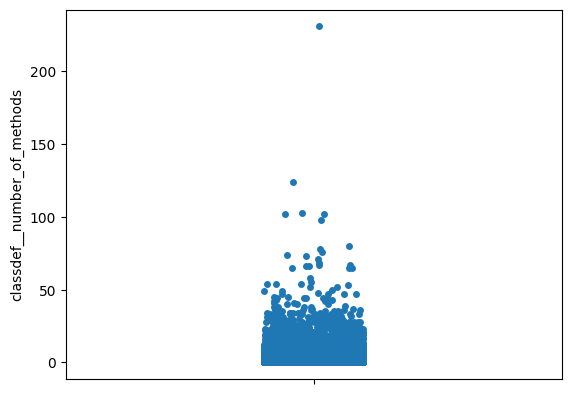

In [34]:
sns.stripplot(X['classdef__number_of_methods'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes.

In [35]:
print_outliers_for_df_column(X, 'classdef__number_of_methods')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7267632816049598
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.5285357569592286,114.81669817924183]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -11.0 (Q1-3*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -5.0 (Q1-1.5*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
+1.5IQR: 905 instancias tienen un valor para classdef__number_of_methods superior a 11.0 (Q3+1.5*IQR) para classdef__number_of_methods. Representando un 6.212% del total de instancias.
+3.0IQR: 384 instancias tienen un valor para classdef__number_of_methods superior a 17.0 (Q3-3*IQR) para classdef__number_of_methods. Representando un 2.636% del total de instancias.
L

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17 (Con un MC de 73 usamos Tuckey)

In [36]:
X[X['classdef__number_of_methods'] > 17].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,384.0,384.000000,384.000000,384.000000,384.000000,384.0,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.0,384.000000,384.0,384.000000,384.000000,384.000000,384.000000
mean,0.0,14.085938,0.130208,29.554688,0.950521,0.0,0.625000,32.268230,0.049385,0.024515,...,0.026014,0.011238,0.071104,0.0,0.942708,0.0,0.002604,0.046875,0.005208,0.002604
std,0.0,5.788745,0.359466,17.865530,2.316960,0.0,0.484755,18.479639,0.104610,0.029201,...,0.112987,0.067723,0.149624,0.0,0.232702,0.0,0.051031,0.211647,0.072075,0.051031
min,0.0,3.000000,0.000000,18.000000,0.000000,0.0,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,20.000000,1.000000,0.0,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,14.000000,0.000000,24.000000,1.000000,0.0,1.000000,27.000000,0.000000,0.025000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,18.000000,0.000000,32.000000,1.000000,0.0,1.000000,35.000000,0.044697,0.040000,...,0.000000,0.000000,0.074306,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,0.0,33.000000,3.000000,231.000000,45.000000,0.0,1.000000,232.000000,0.551020,0.233333,...,1.000000,0.766667,0.903846,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar los 2 que son mayores de 116

In [37]:
X[X['classdef__number_of_methods'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,2456.000000,2456.000000,2456.000000,2456.0,2456.000000,2456.0,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.0,2456.0,2456.0,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.109121,14.381922,0.188925,0.0,0.863599,0.0,0.296010,2.891694,0.660540,0.129778,...,0.0,0.0,0.0,0.002850,0.888844,0.002443,0.003664,0.046417,0.006107,0.049674
std,0.311854,7.039538,0.409828,0.0,0.539029,0.0,0.456588,3.768299,0.428971,0.247003,...,0.0,0.0,0.0,0.053322,0.314390,0.049376,0.060436,0.210429,0.077927,0.217315
min,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,0.0,1.000000,0.0,0.000000,2.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,19.000000,0.000000,0.0,1.000000,0.0,1.000000,3.000000,1.000000,0.166667,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,45.000000,2.000000,0.0,3.000000,0.0,1.000000,46.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Casi 2500 clases sin métodos? 

### Variable number_of_base_classes (8/23)
Esta variable representa el número de base_classes que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 45. Con una media de 0.79.

<Axes: ylabel='classdef__number_of_base_classes'>

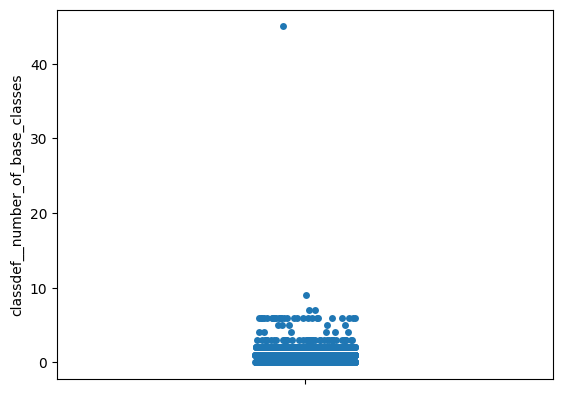

In [38]:
sns.stripplot(X['classdef__number_of_base_classes'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes.

In [39]:
print_outliers_for_df_column(X, 'classdef__number_of_base_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.480068791574902
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.27949366212510496,11.234253438168604]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_base_classes inferior a -3.0 (Q1-3*IQR) para classdef__number_of_base_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_base_classes inferior a -1.5 (Q1-1.5*IQR) para classdef__number_of_base_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 88 instancias tienen un valor para classdef__number_of_base_classes superior a 2.5 (Q3+1.5*IQR) para classdef__number_of_base_classes. Representando un 0.604% del total de instancias.
+3.0IQR: 37 instancias tienen un valor para classdef__number_of_base_classes superior a 4.0 (Q3-3*IQR) para classdef__number_of_base_classes. Representando un 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4 (Con un MC de 48 usamos Tuckey Extremo)

In [40]:
X[X['classdef__number_of_base_classes'] > 4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,37.0,37.000000,37.0,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,...,37.0,37.0,37.000000,37.0,37.0,37.0,37.0,37.0,37.0,37.0
mean,0.0,10.486486,0.0,2.540540,7.054054,0.0,0.918919,4.270270,0.259009,0.274582,...,0.0,0.0,0.013631,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,2.577915,0.0,3.983261,6.446127,0.0,0.276725,3.709213,0.138588,0.112982,...,0.0,0.0,0.059103,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,5.000000,0.0,1.000000,5.000000,0.0,0.000000,3.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,9.000000,0.0,1.000000,6.000000,0.0,1.000000,3.000000,0.333333,0.333333,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,10.000000,0.0,1.000000,6.000000,0.0,1.000000,3.000000,0.333333,0.333333,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,12.000000,0.0,1.000000,6.000000,0.0,1.000000,3.000000,0.333333,0.333333,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,17.000000,0.0,23.000000,45.000000,0.0,1.000000,24.000000,0.333333,0.333333,...,0.0,0.0,0.304348,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Hay que revisar la clase que tiene 45 clases base.

### Variable average_stmts_method_body (9/23)
Esta variable representa el número medio de sentencias en los métodos de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 3.11.

<Axes: ylabel='classdef__average_stmts_method_body'>

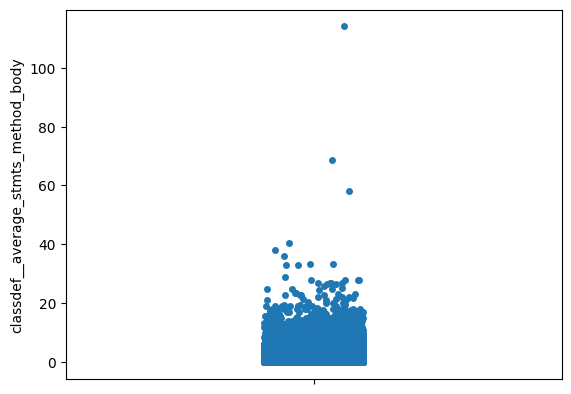

In [41]:
sns.stripplot(X['classdef__average_stmts_method_body'])

### IMPORTANTE
El tres valores maximos estan muy alejados de los siguientes.

In [42]:
print_outliers_for_df_column(X, 'classdef__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8610221386208738
Rango valores atípicos extremos (Tukey): [-8.59999942779541,13.799999237060547]
Rango valores atípicos leves (Tukey): [-3.799999713897705,8.999999523162842]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7642448769542762,154.51068892921947]
-3.0IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -8.59999942779541 (Q1-3*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -3.799999713897705 (Q1-1.5*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 641 instancias tienen un valor para classdef__average_stmts_method_body superior a 8.999999523162842 (Q3+1.5*IQR) para classdef__average_stmts_method_body. Representando un 4.4% del total de instancias.
+3.0IQR: 183 instancias tienen un valor para c

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 14 (Con un MC de 86 usamos Tuckey Extremo)

In [43]:
X[X['classdef__average_stmts_method_body'] > 14].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,164.0,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.0,164.000000,164.0,164.000000,164.0,164.0,164.000000,164.000000,164.00000
mean,0.0,16.176828,0.207317,3.457317,0.871951,0.0,0.353659,4.207317,0.086322,0.100932,...,0.041479,0.0,0.002033,0.0,0.939024,0.0,0.0,0.030488,0.006098,0.02439
std,0.0,7.793293,0.569960,6.589032,0.369969,0.0,0.479569,6.670580,0.186667,0.153026,...,0.185625,0.0,0.026029,0.0,0.240018,0.0,0.0,0.172452,0.078087,0.15473
min,0.0,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000
25%,0.0,9.750000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.00000
50%,0.0,15.000000,0.000000,2.000000,1.000000,0.0,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.00000
75%,0.0,21.000000,0.000000,3.000000,1.000000,0.0,1.000000,4.000000,0.000000,0.250000,...,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.00000
max,0.0,38.000000,3.000000,78.000000,2.000000,0.0,1.000000,78.000000,0.823529,0.500000,...,1.000000,0.0,0.333333,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.00000


### IMPORTANTE
Hay 4 clases con una media de mas de 40 sentencias en el cuerpo de los métodos.

### Variable body_count (10/23)
Esta variable representa el número de sentencias que tiene la clase en el root. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 618. Con una media de 5.4.

<Axes: ylabel='classdef__body_count'>

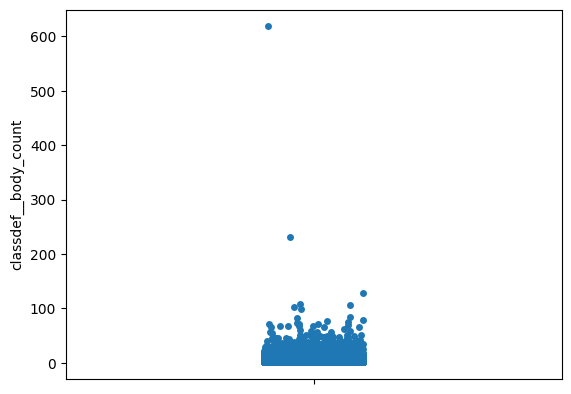

In [44]:
sns.stripplot(X['classdef__body_count'])

### IMPORTANTE
El valor maximo esta muy alejado de los siguientes.

In [45]:
print_outliers_for_df_column(X, 'classdef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8935151417332138
Rango valores atípicos extremos (Tukey): [-10.0,18.0]
Rango valores atípicos leves (Tukey): [-4.0,12.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.7369848192107817,219.96662312686954]
-3.0IQR: 0 instancias tienen un valor para classdef__body_count inferior a -10.0 (Q1-3*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__body_count inferior a -4.0 (Q1-1.5*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 1187 instancias tienen un valor para classdef__body_count superior a 12.0 (Q3+1.5*IQR) para classdef__body_count. Representando un 8.147% del total de instancias.
+3.0IQR: 583 instancias tienen un valor para classdef__body_count superior a 18.0 (Q3-3*IQR) para classdef__body_count. Representando un 4.002% del total de instancias.
L: 2715 instancias tienen un valor para classdef__body_c

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 18.0 (Con un MC de 89 usamos Tuckey Extremo)

In [46]:
X[X['classdef__body_count'] > 18].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.0,583.000000,583.000000,583.000000,583.000000,...,583.000000,583.000000,583.000000,583.0,583.000000,583.0,583.000000,583.000000,583.000000,583.000000
mean,0.020583,13.912521,0.144082,22.670670,0.933105,0.0,0.677530,30.787308,0.220040,0.034256,...,0.024185,0.009551,0.082674,0.0,0.941681,0.0,0.005146,0.032590,0.005146,0.015437
std,0.142106,5.724268,0.388621,17.656651,1.899716,0.0,0.467823,29.046404,0.290334,0.054073,...,0.108252,0.059218,0.162145,0.0,0.234547,0.0,0.071611,0.177714,0.071611,0.123390
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,13.000000,1.000000,0.0,0.000000,21.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,20.000000,1.000000,0.0,1.000000,25.000000,0.052632,0.031250,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,17.000000,0.000000,27.500000,1.000000,0.0,1.000000,33.000000,0.397917,0.043478,...,0.000000,0.000000,0.107143,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,33.000000,3.000000,231.000000,45.000000,0.0,1.000000,618.000000,1.000000,0.526316,...,1.000000,0.766667,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay 2 clases con mas de 220 sentencias en el body.  

### Variable number_of_keywords (11/23)
Esta variable representa el número de keywords diferentes de metaclass que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. La media es 0.0008. 

<Axes: ylabel='classdef__number_of_keywords'>

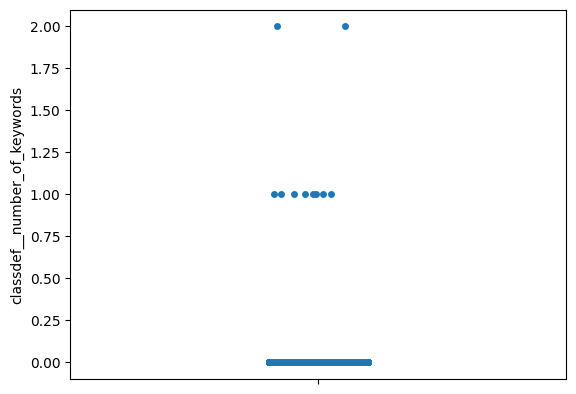

In [47]:
sns.stripplot(X['classdef__number_of_keywords'])

In [48]:
print_outliers_for_df_column(X, 'classdef__number_of_keywords')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9873633811891638
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+1.5IQR: 10 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_keywords. Representando un 0.06864% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3-3*IQR) para classdef__number_of_keywords. Representando un 0.06864% del total de instancias.
L: 0 instancias tienen un valor

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [49]:
X[X['classdef__number_of_keywords'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,10.0,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,0.0,16.799999,0.700000,0.900000,1.0,0.0,0.800000,8.000000,0.809372,0.120459,...,0.033333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,3.489667,0.483046,1.449138,0.0,0.0,0.421637,6.182412,0.120404,0.093604,...,0.105409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,12.000000,0.000000,0.000000,1.0,0.0,0.000000,1.000000,0.666667,0.000000,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,14.500000,0.250000,0.000000,1.0,0.0,1.000000,4.250000,0.750000,0.053442,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,17.000000,1.000000,0.000000,1.0,0.0,1.000000,6.000000,0.780193,0.105556,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,18.750000,1.000000,1.000000,1.0,0.0,1.000000,9.750000,0.875000,0.191667,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,0.0,23.000000,1.000000,4.000000,1.0,0.0,1.000000,23.000000,1.000000,0.250000,...,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### IMPORTANTE
El 99,9% de las clases no tienen keywords.

### Variable height (12/23)
Esta variable representa la distancia a la raiz del modulo en la que se encuentra la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 8. Con una media de 1.1.

<Axes: ylabel='classdef__height'>

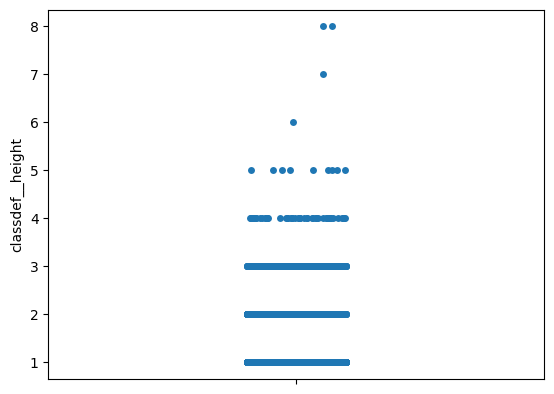

In [50]:
sns.stripplot(X['classdef__height'])

In [51]:
print_outliers_for_df_column(X, 'classdef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-3*IQR) para classdef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-1.5*IQR) para classdef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 2186 instancias tienen un valor para classdef__height superior a 1.0 (Q3+1.5*IQR) para classdef__height. Representando un 15.0% del total de instancias.
+3.0IQR: 2186 instancias tienen un valor para classdef__height superior a 1.0 (Q3-3*IQR) para classdef__height. Representando un 15.0% del total de instancias.
L: 0 instancias tienen un valor para classdef__height inferior a 1.0 para classdef__height. Representando un 0.0% del total de instancias.
U: 21

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [52]:
X[X['classdef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.0,2186.000000,2186.00000,2186.000000,2186.000000,...,2186.000000,2186.0,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,0.016468,8.903019,0.556267,1.531107,0.342635,0.0,0.048033,1.95151,0.130923,0.016144,...,0.005455,0.0,0.005144,0.000457,0.830741,0.004117,0.005032,0.026075,0.008692,0.124886
std,0.127297,6.219238,0.535076,1.573869,0.587578,0.0,0.213885,1.68407,0.322330,0.084579,...,0.062820,0.0,0.058988,0.021388,0.375066,0.064047,0.070774,0.159395,0.092844,0.330665
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,12.000000,1.000000,2.000000,1.000000,0.0,0.000000,2.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,44.000000,2.000000,27.000000,9.000000,0.0,1.000000,27.00000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar los que tiene profundidad mayor que 5. 

### Variable assignments_pct (13/23)
Esta variable representa la proporción de las sentencias en el root de la clase que son asignaciones. Toma los valores de 0.0 - 1.0. La media es 0.17.

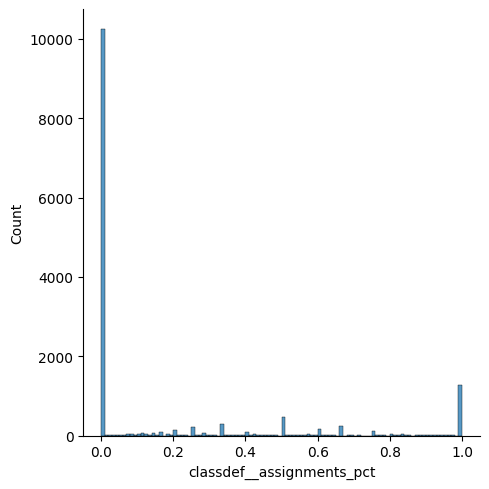

In [53]:
sns.displot(X['classdef__assignments_pct'], bins=[i / 100 for i in range(0, 101)])

In [54]:
print_outliers_for_df_column(X, 'classdef__assignments_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5931146591901779
Rango valores atípicos extremos (Tukey): [-0.6923076957464218,0.9230769276618958]
Rango valores atípicos leves (Tukey): [-0.3461538478732109,0.5769230797886848]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.04342268568161916,3.9428281274147463]
-3.0IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.6923076957464218 (Q1-3*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.3461538478732109 (Q1-1.5*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2089 instancias tienen un valor para classdef__assignments_pct superior a 0.5769230797886848 (Q3+1.5*IQR) para classdef__assignments_pct. Representando un 14.34% del total de instancias.
+3.0IQR: 1299 instancias tienen un valor para classdef__assignments_pct superior a 0.92307692

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.625 (Con un MC de 53 usamos Tuckey)

In [55]:
X[X['classdef__assignments_pct'] > 0.625].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.0,1900.000000,1900.000000,1900.000000,1900.000000,...,1900.000000,1900.0,1900.000000,1900.000000,1900.000000,1900.0,1900.000000,1900.000000,1900.000000,1900.000000
mean,0.141579,14.460526,0.205789,0.240526,0.852632,0.0,0.246316,4.243684,0.917091,0.049591,...,0.002193,0.0,0.017316,0.001053,0.896842,0.0,0.003158,0.054737,0.004737,0.039474
std,0.348710,6.698582,0.439335,0.780583,0.552050,0.0,0.430978,5.164089,0.127966,0.099691,...,0.040326,0.0,0.118855,0.032436,0.304245,0.0,0.056121,0.227526,0.068680,0.194770
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.636364,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.818182,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,0.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,19.000000,0.000000,0.000000,1.000000,0.0,0.000000,5.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,37.000000,3.000000,10.000000,2.000000,0.0,1.000000,46.000000,1.000000,0.333333,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 70% de las clases no tienen asignaciones en el root.

### Variable expressions_pct (14/23)
Esta variable representa la proporción de las sentencias en root de la clase que son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.09.

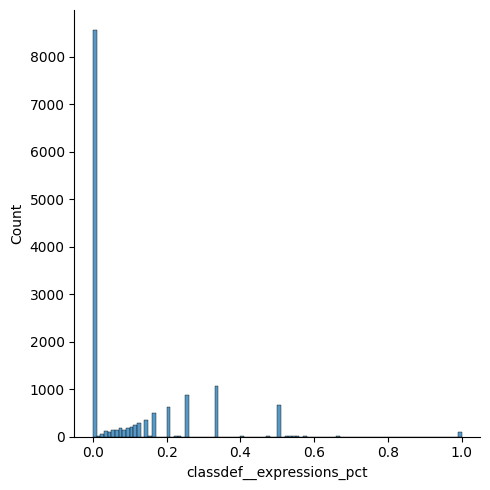

In [56]:
sns.displot(X['classdef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [57]:
print_outliers_for_df_column(X, 'classdef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4269403377786709
Rango valores atípicos extremos (Tukey): [-0.5000000149011612,0.6666666865348816]
Rango valores atípicos leves (Tukey): [-0.2500000074505806,0.416666679084301]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.056101904790619356,1.545816192278787]
-3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.5000000149011612 (Q1-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.2500000074505806 (Q1-1.5*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 787 instancias tienen un valor para classdef__expressions_pct superior a 0.416666679084301 (Q3+1.5*IQR) para classdef__expressions_pct. Representando un 5.402% del total de instancias.
+3.0IQR: 103 instancias tienen un valor para classdef__expressions_pct superior a 0.666666686534

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.66 (Con un MC de 42 usamos Tuckey)

In [58]:
X[X['classdef__expressions_pct'] > 0.666].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,105.0,105.000000,105.000000,105.0,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,...,105.0,105.0,105.0,105.0,105.000000,105.0,105.0,105.000000,105.0,105.0
mean,0.0,17.409523,0.095238,0.0,1.000000,0.0,0.952381,1.038095,0.006349,0.993651,...,0.0,0.0,0.0,0.0,0.904762,0.0,0.0,0.095238,0.0,0.0
std,0.0,7.040672,0.294951,0.0,0.310087,0.0,0.213980,0.274696,0.045783,0.045783,...,0.0,0.0,0.0,0.0,0.294951,0.0,0.0,0.294951,0.0,0.0
min,0.0,5.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.666667,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,0.0,13.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
50%,0.0,17.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
75%,0.0,20.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
max,0.0,35.000000,1.000000,0.0,2.000000,0.0,1.000000,3.000000,0.333333,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0


### IMPORTANTE
El 58% de las clases no tienen expresiones en el root.

### Variable type_annotations_pct (15/23)
Esta variable representa la proporción de parámetros y returns con anotacion de tipo en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.15. 

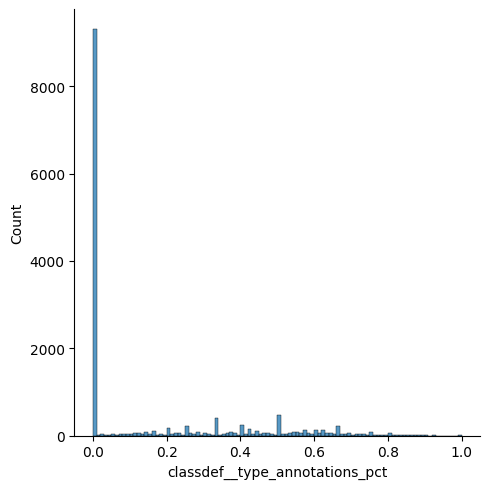

In [59]:
sns.displot(X['classdef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [60]:
print_outliers_for_df_column(X, 'classdef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5652538757430974
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.06914595518994412,5.129746368828438]
-3.0IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -1.0000000298023224 (Q1-3*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 75 instancias tienen un valor para classdef__type_annotations_pct superior a 0.833333358168602 (Q3+1.5*IQR) para classdef__type_annotations_pct. Representando un 0.5148% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__type_annotatio

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.83 (Con un MC de 56 usamos Tuckey)

In [61]:
X[X['classdef__type_annotations_pct'] > 0.833].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,90.0,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.0,90.000000,90.0,90.0,90.000000,90.0,90.0
mean,0.0,15.166667,0.077778,2.333333,0.733333,0.0,0.544444,3.555556,0.109609,0.192976,...,0.134259,0.055556,0.009409,0.0,0.988889,0.0,0.0,0.011111,0.0,0.0
std,0.0,6.275062,0.269322,3.512418,0.614433,0.0,0.500811,4.116590,0.204729,0.202944,...,0.332324,0.230345,0.040737,0.0,0.105409,0.0,0.0,0.105409,0.0,0.0
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,0.0,11.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
50%,0.0,15.000000,0.000000,1.000000,1.000000,0.0,1.000000,2.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
75%,0.0,19.000000,0.000000,2.000000,1.000000,0.0,1.000000,3.750000,0.200000,0.333333,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
max,0.0,34.000000,1.000000,28.000000,2.000000,0.0,1.000000,29.000000,0.846154,0.500000,...,1.000000,1.000000,0.250000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0


### IMPORTANTE
El 63% de las clases no tienen anotaciones de tipo.

### Variable private_methods_pct (16/23)
Esta variable representa la proporción de métodos que son privados en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.07

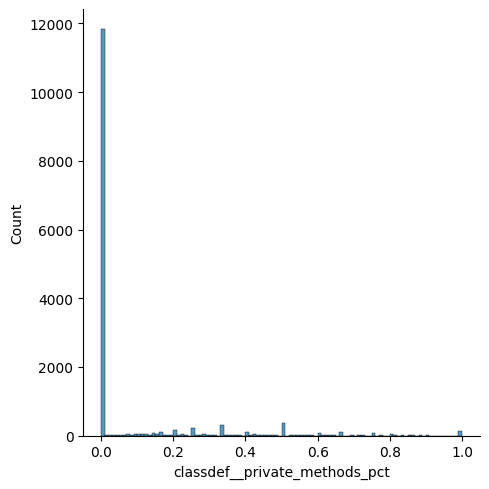

In [62]:
sns.displot(X['classdef__private_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [63]:
print_outliers_for_df_column(X, 'classdef__private_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7646240874206185
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2740 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__private_methods_pct. Representando un 18.81% del total de instancias.
+3.0IQR: 2740 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__private_methods_pct. Representando un 18.81% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [64]:
X[X['classdef__private_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.0,2740.000000,2740.00000,2740.000000,2740.000000,...,2740.000000,2740.000000,2740.000000,2740.0,2740.000000,2740.0,2740.000000,2740.000000,2740.000000,2740.000000
mean,0.000730,16.209854,0.140146,9.104380,0.940146,0.0,0.693796,11.39635,0.086026,0.093761,...,0.024984,0.012392,0.050284,0.0,0.943431,0.0,0.002190,0.039051,0.003650,0.011679
std,0.027012,6.479793,0.392604,10.282185,0.968316,0.0,0.461000,16.14682,0.162157,0.094461,...,0.109368,0.074953,0.122182,0.0,0.231060,0.0,0.046752,0.193752,0.060313,0.107455
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,4.000000,1.000000,0.0,0.000000,5.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16.000000,0.000000,6.000000,1.000000,0.0,1.000000,8.00000,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,0.000000,11.000000,1.000000,0.0,1.000000,13.00000,0.111111,0.142857,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,44.000000,4.000000,231.000000,45.000000,0.0,1.000000,618.00000,0.846154,0.500000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 81% de las clases no tienen métodos privados.

### Variable magic_methods_pct (17/23)
Esta variable representa la proporción de métodos que son magic en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.23

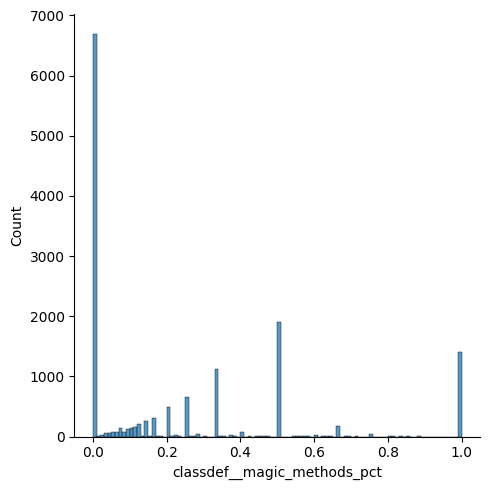

In [65]:
sns.displot(X['classdef__magic_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [66]:
print_outliers_for_df_column(X, 'classdef__magic_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.448113813996315
Rango valores atípicos extremos (Tukey): [-1.2000000178813934,1.600000023841858]
Rango valores atípicos leves (Tukey): [-0.6000000089406967,1.0000000149011612]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.1250272009376227,4.002505763584642]
-3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -1.2000000178813934 (Q1-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -0.6000000089406967 (Q1-1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 1.0000000149011612 (Q3+1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 1.600000

In [67]:
X[X['classdef__magic_methods_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.0,1404.000000,1404.000000,1404.000000,1404.000000,...,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.0,1404.000000,1404.000000,1404.000000,1404.000000
mean,0.004986,12.735755,0.330484,1.443732,0.636752,0.0,0.322650,2.116097,0.061310,0.124239,...,0.001425,0.001353,0.000712,0.000712,0.858262,0.0,0.004986,0.064103,0.009972,0.061966
std,0.070459,7.367405,0.478069,0.775863,0.934316,0.0,0.467656,1.755975,0.177363,0.192647,...,0.037729,0.031673,0.026688,0.026688,0.348905,0.0,0.070459,0.245023,0.099394,0.241179
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,18.000000,1.000000,2.000000,1.000000,0.0,1.000000,2.000000,0.000000,0.270833,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,52.000000,2.000000,12.000000,6.000000,0.0,1.000000,24.000000,0.958333,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 45% de las clases no tienen métodos magic. Y un 10% de las clases tienen todos los métodos magic.

### Variable async_methods_pct (18/23)
Esta variable representa la proporción de métodos que son asincronos en la clase. Esta variable toma valores de 0.0 - 1.1. Su media es 0.03

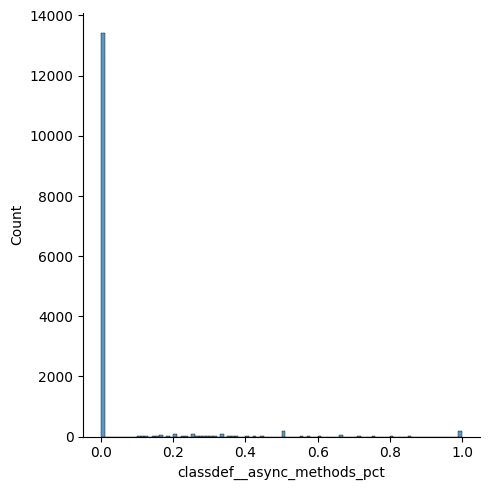

In [68]:
sns.displot(X['classdef__async_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [69]:
print_outliers_for_df_column(X, 'classdef__async_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.857888987594702
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1155 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__async_methods_pct. Representando un 7.928% del total de instancias.
+3.0IQR: 1155 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__async_methods_pct. Representando un 7.928% del total de instancias.
L: 0 instancias tienen un valor para cla

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [70]:
X[X['classdef__async_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1155.0,1155.000000,1155.000000,1155.000000,1155.000000,1155.0,1155.000000,1155.000000,1155.000000,1155.000000,...,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.0,1155.000000,1155.000000,1155.0,1155.000000
mean,0.0,14.599134,0.356710,6.507360,0.638961,0.0,0.484848,8.406926,0.076985,0.057318,...,0.006170,0.029423,0.044033,0.001732,0.939394,0.0,0.000866,0.010390,0.0,0.047619
std,0.0,7.016284,0.530716,5.786098,0.547918,0.0,0.499987,8.127277,0.150061,0.076924,...,0.037665,0.133959,0.099719,0.041594,0.238710,0.0,0.029424,0.101442,0.0,0.213051
min,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.0,10.000000,0.000000,2.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,0.0,15.000000,0.000000,5.000000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,0.0,19.000000,1.000000,9.000000,1.000000,0.0,1.000000,11.000000,0.090909,0.100000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000
max,0.0,39.000000,4.000000,50.000000,2.000000,0.0,1.000000,51.000000,0.666667,0.500000,...,0.500000,1.000000,0.625000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000


### IMPORTANTE
Cerca del 8% de las clases tienen algún método asíncrono.

### Variable class_methods_pct (19/23)
Esta variable representa la proporción de métodos que son de clase en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.035

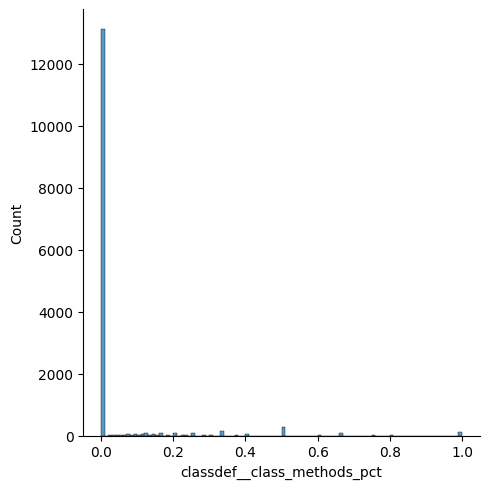

In [71]:
sns.displot(X['classdef__class_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [72]:
print_outliers_for_df_column(X, 'classdef__class_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8520022189385651
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1461 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__class_methods_pct. Representando un 10.03% del total de instancias.
+3.0IQR: 1461 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__class_methods_pct. Representando un 10.03% del total de instancias.
L: 0 instancias tienen un valor para cl

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [73]:
X[X['classdef__class_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.0,1461.000000,1461.000000,1461.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.0,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.008898,15.466119,0.095140,6.938398,0.836413,0.0,0.583162,10.434634,0.224564,0.076844,...,0.010505,0.013514,0.047255,0.001369,0.942505,0.0,0.001369,0.023272,0.002738,0.028747
std,0.093941,6.400534,0.324539,7.137805,0.457736,0.0,0.493204,18.152040,0.245834,0.095525,...,0.061018,0.093352,0.110571,0.036986,0.232865,0.0,0.036986,0.150817,0.052271,0.167153
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,3.000000,1.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.000000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.133333,0.052632,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,19.000000,0.000000,9.000000,1.000000,0.0,1.000000,12.000000,0.437500,0.125000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,39.000000,2.000000,102.000000,3.000000,0.0,1.000000,618.000000,0.909091,0.500000,...,0.812500,1.000000,0.759259,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Apenas el 10% de las clases tienen algún método de clase.

### Variable static_methods_pct (20/23)
Esta variable representa la proporción de métodos que son estaticos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.017.

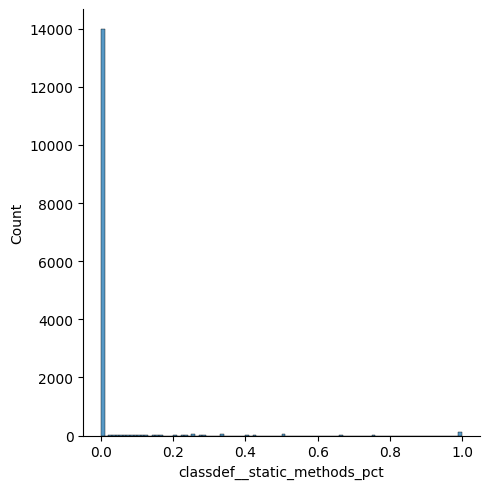

In [74]:
sns.displot(X['classdef__static_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [75]:
print_outliers_for_df_column(X, 'classdef__static_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9139798275627848
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 594 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__static_methods_pct. Representando un 4.077% del total de instancias.
+3.0IQR: 594 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__static_methods_pct. Representando un 4.077% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [76]:
X[X['classdef__static_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.0,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.0,594.000000,594.000000,594.000000,594.000000
mean,0.001684,14.668350,0.173401,9.257576,0.821549,0.0,0.515152,11.740741,0.069966,0.069679,...,0.414561,0.006921,0.024859,0.001684,0.914141,0.0,0.005051,0.058923,0.006734,0.013468
std,0.041031,6.677548,0.392037,14.860770,0.455590,0.0,0.500192,29.328806,0.157974,0.094771,...,0.355634,0.052968,0.070206,0.041031,0.280391,0.0,0.070947,0.235678,0.081853,0.115365
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.009709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,3.000000,1.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,6.000000,1.000000,0.0,1.000000,7.000000,0.000000,0.018576,...,0.250000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,18.000000,0.000000,10.000000,1.000000,0.0,1.000000,12.000000,0.000000,0.125000,...,0.691667,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,43.000000,2.000000,231.000000,3.000000,0.0,1.000000,618.000000,0.838710,0.500000,...,1.000000,0.800000,0.416667,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 95% de las clases no tienen métodos estáticos.

### Variable abstract_methods_pct (21/23)
Esta variable representa la proporción de métodos que son abstractos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.01

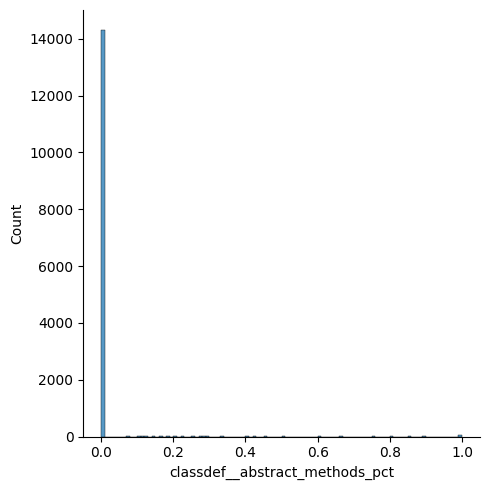

In [77]:
sns.displot(X['classdef__abstract_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [78]:
print_outliers_for_df_column(X, 'classdef__abstract_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9362630997733608
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 271 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__abstract_methods_pct. Representando un 1.86% del total de instancias.
+3.0IQR: 271 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__abstract_methods_pct. Representando un 1.86% del total de instancias.
L: 0 instancias tie

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [79]:
X[X['classdef__abstract_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,271.0,271.000000,271.000000,271.000000,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.000000,271.000000,271.0,271.000000,271.0,271.0,271.000000,271.0,271.0
mean,0.0,15.782288,0.059041,7.261992,1.162362,0.0,0.741697,8.811809,0.051445,0.144292,...,0.011725,0.540514,0.076748,0.0,0.988930,0.0,0.0,0.011070,0.0,0.0
std,0.0,5.735579,0.236137,6.851439,0.623182,0.0,0.438511,7.403053,0.117600,0.142729,...,0.072679,0.328343,0.175851,0.0,0.104824,0.0,0.0,0.104824,0.0,0.0
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.022222,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,0.0,12.000000,0.000000,3.000000,1.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
50%,0.0,15.000000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.000000,0.100000,...,0.000000,0.500000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
75%,0.0,20.000000,0.000000,9.000000,1.000000,0.0,1.000000,11.000000,0.000000,0.200000,...,0.000000,0.900000,0.090909,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
max,0.0,34.000000,1.000000,45.000000,3.000000,0.0,1.000000,46.000000,0.500000,0.500000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0


### IMPORTANTE
Cerca de un 2% de las clases tienen algún método abstracto.

### Variable property_methods_pct (22/23)
Esta variable representa la proporción de métodos que son property en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.02

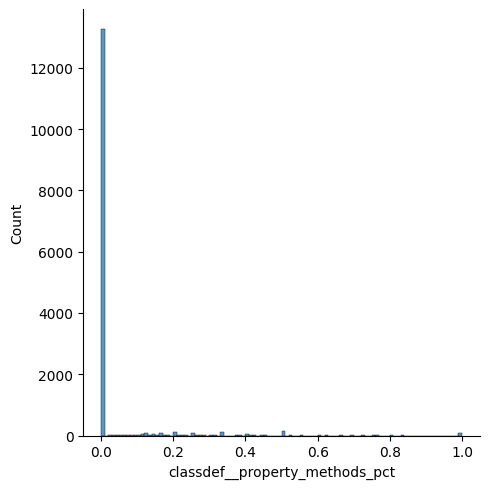

In [80]:
sns.displot(X['classdef__property_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [81]:
print_outliers_for_df_column(X, 'classdef__property_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8631516265494878
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1320 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__property_methods_pct. Representando un 9.06% del total de instancias.
+3.0IQR: 1320 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__property_methods_pct. Representando un 9.06% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [82]:
X[X['classdef__property_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.0,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.0,1320.000000,1320.000000,1320.000000,1320.000000
mean,0.003030,14.739394,0.159848,9.889394,0.890152,0.0,0.665152,12.890152,0.148994,0.079881,...,0.009387,0.027655,0.313002,0.002273,0.946212,0.0,0.001515,0.037879,0.002273,0.009848
std,0.054986,6.123715,0.398321,12.496788,1.329969,0.0,0.472116,13.623027,0.208621,0.086528,...,0.043642,0.133050,0.241687,0.047637,0.225684,0.0,0.038910,0.190975,0.047637,0.098787
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.004329,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,4.000000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,7.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.066667,...,0.000000,0.000000,0.233032,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,19.000000,0.000000,11.000000,1.000000,0.0,1.000000,15.000000,0.272727,0.125000,...,0.000000,0.000000,0.428571,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,37.000000,2.000000,231.000000,45.000000,0.0,1.000000,232.000000,0.975610,0.500000,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 90% de las clases no tienen métodos property.

### Variable name_convention (23/23)
Esta variable es de tipo categórica y representa la name_convention del nombre de la clase.

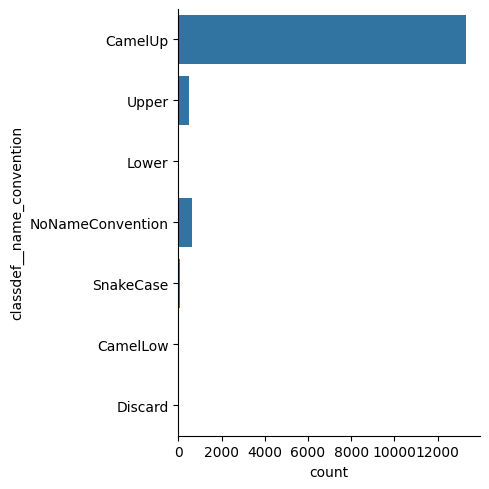

In [83]:
sns.catplot(full_table['classdef__name_convention'], kind="count")

In [84]:
print_frequency_anal_for_cat_var(full_table, 'classdef__name_convention')

La variable classdef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable classdef__name_convention toma el valor de CamelUp en un 91.26% de los items.
La variable classdef__name_convention toma el valor de NoNameConvention en un 4.228% de los items.
La variable classdef__name_convention toma el valor de Upper en un 3.432% de los items.
La variable classdef__name_convention toma el valor de SnakeCase en un 0.4324% de los items.
La variable classdef__name_convention toma el valor de Lower en un 0.2951% de los items.
La variable classdef__name_convention toma el valor de CamelLow en un 0.2883% de los items.
La variable classdef__name_convention toma el valor de Discard en un 0.06178% de los items.


In [85]:
print_values_usage_for_cat_var(full_table, 'classdef__name_convention', NAMING_CONVENTION_VALUES)

La variable classdef__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### IMPORTANTE
Mas de un 9% no sigue el convenio de nombrado de clases de Python

## Multivariate

Isolation forest algorithm

In [86]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,classdef__name_convention,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,...,classdef__average_stmts_method_body,classdef__type_annotations_pct,classdef__private_methods_pct,classdef__magic_methods_pct,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__expertise_level
8002,NoNameConvention,False,10,0,10,1,False,True,11,0.000000,...,6.200000,0.000000,0.900000,0.000000,0.0,0.0,1.000000,0.0,0.000000,EXPERT
14105,NoNameConvention,False,9,1,28,0,False,True,36,0.194444,...,2.500000,0.272727,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.500000,EXPERT
16739,Upper,False,1,2,1,0,False,False,1,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16846,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16847,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16848,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16849,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16850,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16887,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT
16889,Upper,False,1,1,1,0,False,False,1,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,0.0,0.000000,EXPERT


### IMPORTANTE
Hay que analizar las 12 clases que son outliers.

In [87]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
classdef__is_enum_class,18.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
classdef__number_of_characters,18.0,7.722222,10.357183,1.0,1.000000,1.0,10.000000,37.000000
classdef__number_of_decorators,18.0,0.777778,0.646762,0.0,0.000000,1.0,1.000000,2.000000
classdef__number_of_methods,18.0,13.777778,29.592438,1.0,1.000000,1.0,9.750000,124.000000
classdef__number_of_base_classes,18.0,0.277778,0.460889,0.0,0.000000,0.0,0.750000,1.000000
classdef__has_generic_type_annotations,18.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
classdef__has_doc_string,18.0,0.388889,0.501631,0.0,0.000000,0.0,1.000000,1.000000
classdef__body_count,18.0,16.166666,31.003321,1.0,1.000000,1.0,17.000000,129.000000
classdef__assignments_pct,18.0,0.085607,0.209267,0.0,0.000000,0.0,0.023256,0.833333
classdef__expressions_pct,18.0,0.027304,0.060913,0.0,0.000000,0.0,0.027083,0.250000


In [88]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
classdef__is_enum_class,14551.0,0.020480,0.141639,0.0,0.0,0.000000,0.000000,1.0
classdef__number_of_characters,14551.0,14.349461,6.992593,1.0,9.0,14.000000,19.000000,52.0
classdef__number_of_decorators,14551.0,0.216824,0.448205,0.0,0.0,0.000000,0.000000,5.0
classdef__number_of_methods,14551.0,3.883307,5.978655,0.0,1.0,2.000000,5.000000,231.0
classdef__number_of_base_classes,14551.0,0.794447,0.691638,0.0,0.0,1.000000,1.000000,45.0
classdef__has_generic_type_annotations,14551.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
classdef__has_doc_string,14551.0,0.411037,0.492039,0.0,0.0,0.000000,1.000000,1.0
classdef__body_count,14551.0,5.365336,8.450941,1.0,2.0,3.000000,6.000000,618.0
classdef__assignments_pct,14551.0,0.176228,0.323019,0.0,0.0,0.000000,0.230769,1.0
classdef__expressions_pct,14551.0,0.098315,0.159124,0.0,0.0,0.000000,0.166667,1.0
